# 1. Aim:

To Study and implement K-Nearest Neighbours (KNN).

# 2. Theory:

## 2.1 What is KNN?

K-Nearest Neighbors (KNN) is a simple but powerful classification and regression algorithm in machine learning. It is a non-parametric method that is used for both regression and classification problems.

In KNN, the prediction is based on the class (in case of classification) or the mean value (in case of regression) of the nearest neighbors.

## 2.2 How KNN works?

KNN works by finding the k closest data points in the training set to the given test data point, where k is a user-defined parameter. The predicted class or mean value is then assigned to the test data point based on the majority class or mean value of the k-nearest neighbors.

To find the k-nearest neighbors, the algorithm uses a distance metric to measure the distance between the test data point and each training data point. The most commonly used distance metric is the Euclidean distance, but other metrics such as Manhattan distance, Minkowski distance, and Hamming distance can also be used.

KNN is a lazy learning algorithm, which means that it does not learn a model from the training data but instead memorizes the training data.

# 3. Implementation:

## 3.1 Importing Packages and Dataset

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"]=iris.target_names[iris.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 3.2 Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

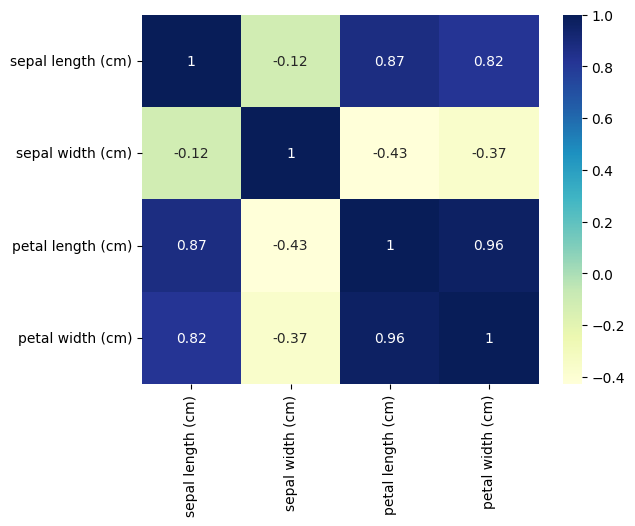

In [6]:
sns.heatmap(data=df.drop(['target'], axis=1).corr(), cmap="YlGnBu", annot=True)

<Axes: xlabel='sepal length (cm)', ylabel='Density'>

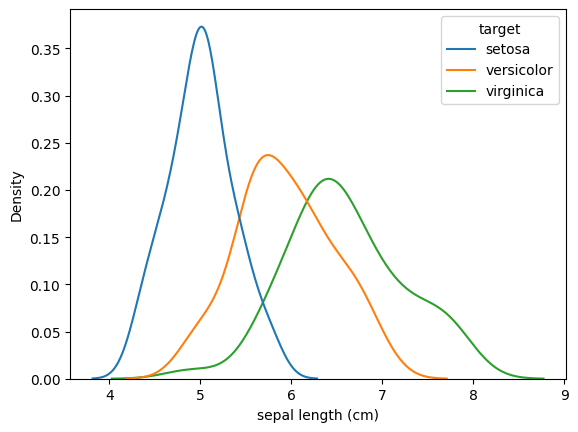

In [7]:
sns.kdeplot(data=df, x='sepal length (cm)', hue='target')

<Axes: xlabel='sepal width (cm)', ylabel='Density'>

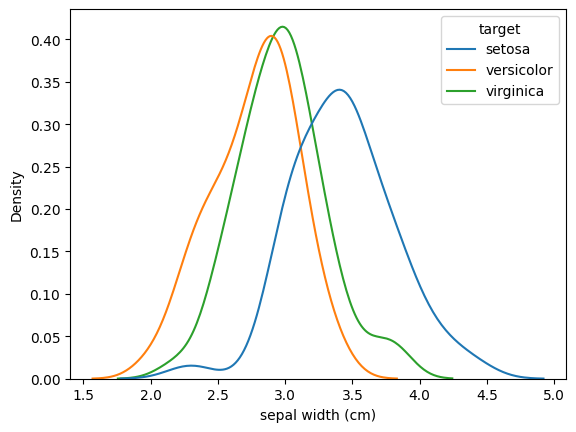

In [8]:
sns.kdeplot(data=df, x='sepal width (cm)', hue='target')

<Axes: xlabel='petal length (cm)', ylabel='Density'>

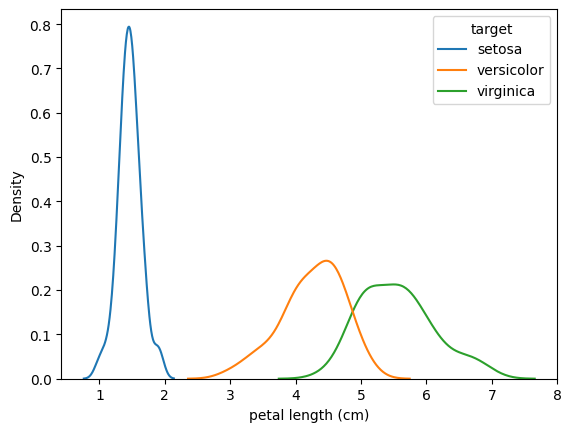

In [9]:
sns.kdeplot(data=df, x='petal length (cm)', hue='target')

<Axes: xlabel='petal width (cm)', ylabel='Density'>

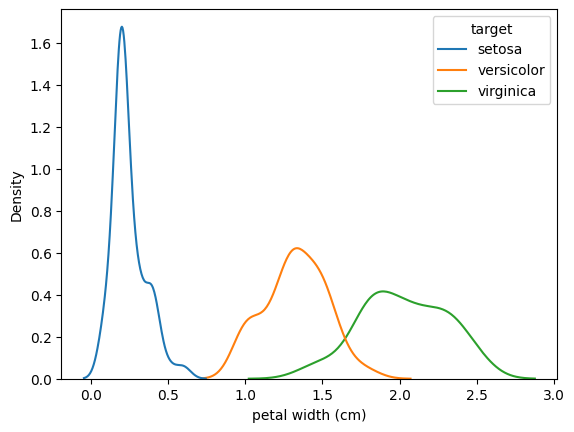

In [10]:
sns.kdeplot(data=df, x='petal width (cm)', hue='target')

## 3.3 Data Preprocessing

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df.target, test_size=0.2, random_state=42)

## 3.4 Modeling and Evaluation

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh=[100, 80, 40, 7, 3, 1]
results={}
for i in neigh:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[i]=accuracy*100
    print(f"Accuracy: {round(accuracy*100, 2)}% on N Neighbour: {i}")

Accuracy: 30.0% on N Neighbour: 100
Accuracy: 63.33% on N Neighbour: 80
Accuracy: 96.67% on N Neighbour: 40
Accuracy: 96.67% on N Neighbour: 7
Accuracy: 100.0% on N Neighbour: 3
Accuracy: 100.0% on N Neighbour: 1


Text(0.5, 0, 'Accuracy Score')

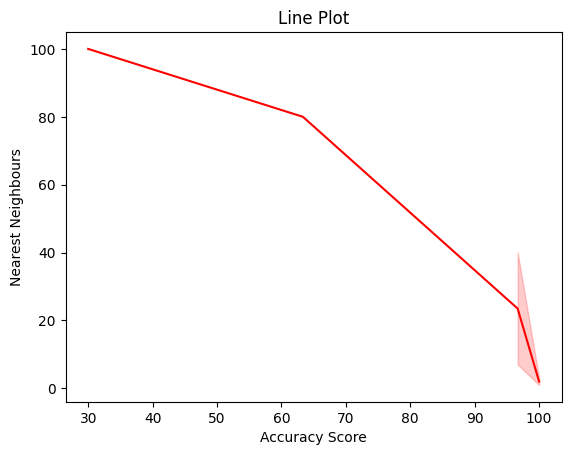

In [13]:
res_df=pd.DataFrame.from_dict(results, orient='index', columns=['value'])
sns.lineplot(y=res_df.index, x='value', data=res_df, color="r")
plt.title('Line Plot')
plt.ylabel('Nearest Neighbours')
plt.xlabel('Accuracy Score')